In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()
#SibSp, quantos pessoas o acompanhando
#Ticket, o código do bilhete dele
#Fare, quanto ele pagou pelo bilhete
#Cabin, número da cabine
#Embarked, onde ele embarcou

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

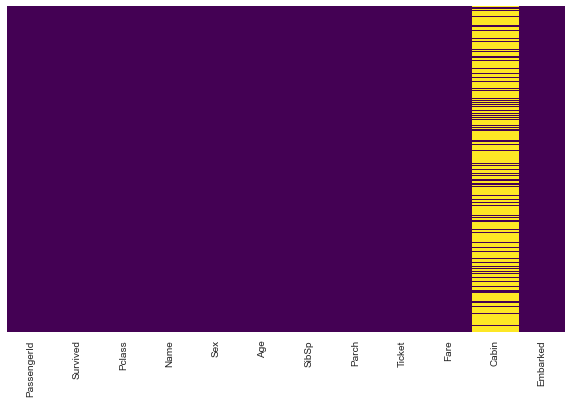

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

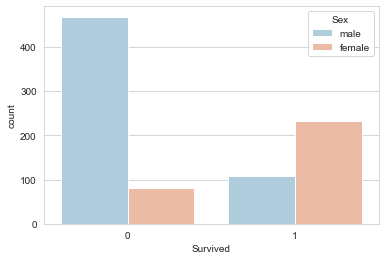

In [21]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

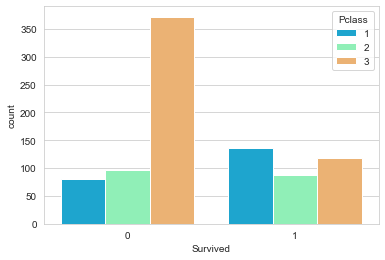

In [23]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

Text(0.5, 0, 'Idade')

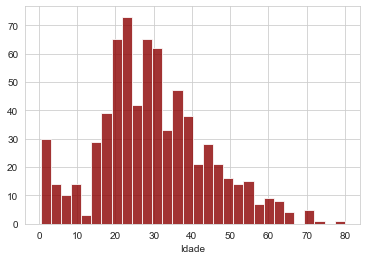

In [3]:
train['Age'].hist(bins=30, color='darkred', alpha=0.8)
plt.xlabel('Idade')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

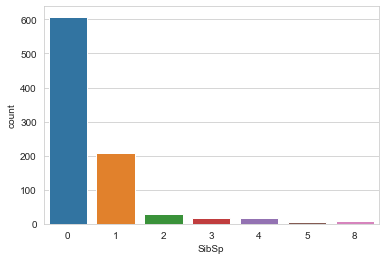

In [29]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

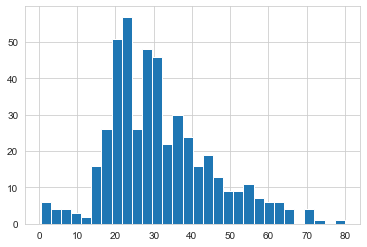

In [33]:
train[train['SibSp'] == 0]['Age'].hist(bins = 30)

<AxesSubplot:>

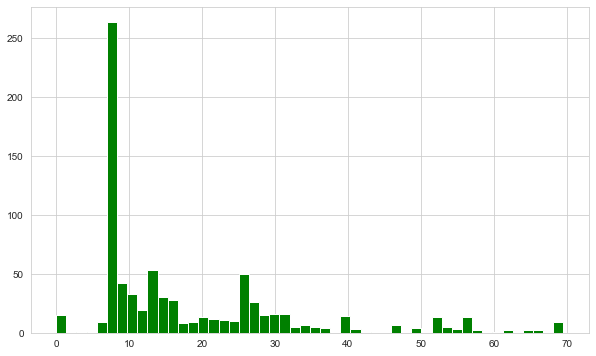

In [5]:
plt.figure(figsize=(10, 6))
train[train['Fare'] <70]['Fare'].hist(color='green' ,bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

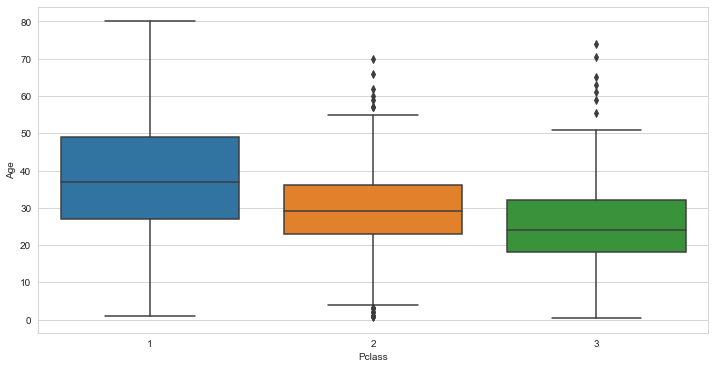

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [38]:
def inputar_idade(cols):
    idade = cols[0]
    classe = cols[1]
    if pd.isna(idade):
        if classe == 1:
            return 38
        elif classe == 2:
            return 29
        else:
            return 24
    else:
        return idade

In [44]:
train = pd.read_csv('titanic_train.csv')

In [45]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

In [47]:
#del train['Cabin']
train.drop(columns='Cabin', inplace=True)

<AxesSubplot:>

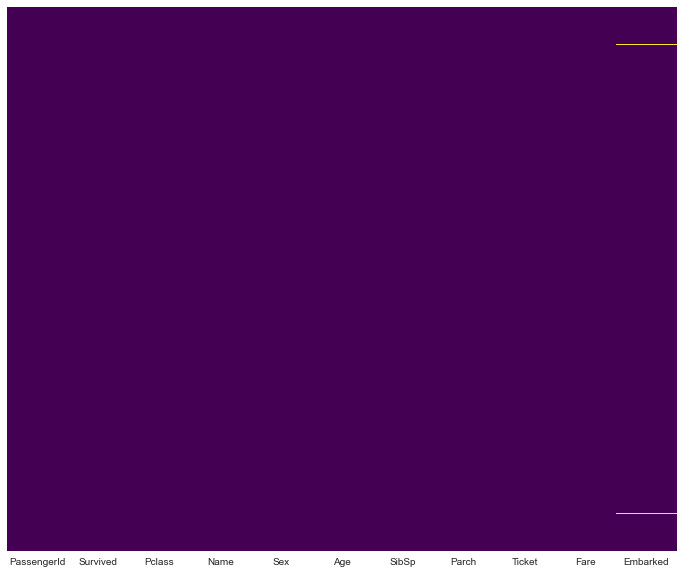

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [59]:
train.dropna(inplace=True)

<AxesSubplot:>

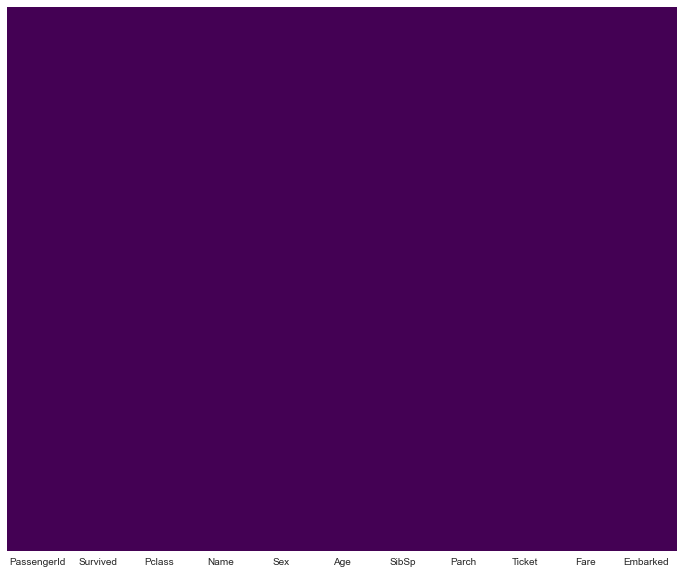

In [60]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [64]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [68]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [73]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [74]:
train.drop(columns=['Sex'], axis=1, inplace=True)

In [75]:
train = pd.concat([train, sex, embark], axis=1)

In [76]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
